In [2]:
import math
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

# 逆行列
* 行列式を求める linalg.det(A)
* 逆行列を求める linalg.inv(A)
    * 逆行列を求められない時 LinAlgError が発生する

In [2]:
A = np.array([[1,2,3],[9,4,3],[5,8,1]], dtype=float)
print("A=\n{}".format(A))
print("det(A) = {}".format(linalg.det(A)))
B = linalg.inv(A)
print("inverse A=\n{}".format(B))
print("A・inverseA=\n{}".format(np.dot(A,B)))

A=
[[1. 2. 3.]
 [9. 4. 3.]
 [5. 8. 1.]]
det(A) = 148.0
inverse A=
[[-0.13513514  0.14864865 -0.04054054]
 [ 0.04054054 -0.09459459  0.16216216]
 [ 0.35135135  0.01351351 -0.09459459]]
A・inverseA=
[[ 1.00000000e+00 -2.25514052e-17  2.77555756e-17]
 [ 1.66533454e-16  1.00000000e+00  1.38777878e-16]
 [ 5.55111512e-17 -8.15320034e-17  1.00000000e+00]]


逆行列が存在しない時に　LinAlgError が発生する仕様は、あまり信用しないほうが良いかも
$$
\begin{bmatrix}
1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 
\end{bmatrix} 
$$
は、逆行列が存在しないけど、LinAlgError が発生せずに誤った逆行列が計算される。当然 M・inv(M) は I(単位行列) にならない

In [3]:
M = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=float)
print("M=\n{}".format(M))
print("det(M) = {}".format(linalg.det(M)))
try :
    print("inverse M= // it's wrong invert matrix \n{}".format(linalg.inv(M)))
    print("** linalg.inv(M) don't throw LinAlgError **")
except LinAlgError as err:
    print(err)
print("M・inverseM= // it's not an identity matrix \n{}".format(np.dot(M,linalg.inv(M))))

M=
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
det(M) = 0.0
inverse M= // it's wrong invert matrix 
[[ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]
 [-6.30503948e+15  1.26100790e+16 -6.30503948e+15]
 [ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]]
** linalg.inv(M) don't throw LinAlgError **
M・inverseM= // it's not an identity matrix 
[[ 0.  1.  0.]
 [-4.  2.  0.]
 [-4.  3.  2.]]


# ノルム
* 2次元、３次元の場合は、ベクトルの長さ
* 行列の場合はその拡張

In [4]:
v = np.array([2.0,3.0])
print("linalg.norm(np.array([2,3]))={} , sqr(2*2+3*3)={}".format(linalg.norm(v), math.sqrt(2.0*2.0+3.0*3.0)))
print("M=\n{}".format(M))
print("linalg.norm(M)={}".format(linalg.norm(M)))

linalg.norm(np.array([2,3]))=3.605551275463989 , sqr(2*2+3*3)=3.605551275463989
M=
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
linalg.norm(M)=16.881943016134134


# 最小二乗推定 (least-squares problems)
* scipy.lstsq(A,B) は、 y = a f(x) + b g(x) + c h(x) + d のとき、最も誤差の少ない a,b,c,d をもとめる

A には、入力パラメータを設定する
$$
 \begin{bmatrix}
f(0) & g(0) & h(0) & 1 \\
f(1) & g(1) & h(1) & 1 \\
f(2) & g(2) & h(2) & 1 \\
f(3) & g(3) & h(3) & 1 \\
\vdots & \vdots & \vdots & \vdots \\
f(n) & g(n) & h(n) & 1 \\
\end{bmatrix} 
$$

B には、y を設定する
$$
 \begin{bmatrix} y_0 & y_1 & y_2 & y_3 & \cdots  & y_n \end{bmatrix} 
$$    

``
(C, resid, rank, sigma) = linalg.lstsq(A, B)
``
    * C : 最小二乗解 [a b c d]
    * resid : 残差の合計
    * rank : 係数行列aのランク
    * sigma :  標準偏差

A=
[[0.    0.    0.    1.   ]
 [0.001 0.01  0.1   1.   ]
 [0.008 0.04  0.2   1.   ]
 [0.027 0.09  0.3   1.   ]
 [0.064 0.16  0.4   1.   ]
 [0.216 0.36  0.6   1.   ]
 [0.512 0.64  0.8   1.   ]
 [1.    1.    1.    1.   ]]
B=[5.2 4.  3.  3.8 4.4 5.4 6.6 6.8]
C=[-22.95848104  39.20132617 -14.58099132   5.07255296]
resid=0.5042085946678523
rank=4
sigma=[3.35026362 1.3730288  0.27820942 0.03761781]


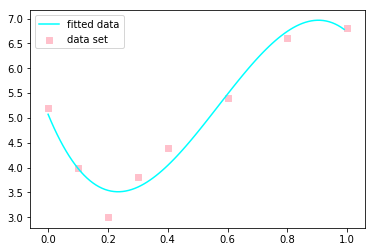

In [5]:
# raw data
y = np.array([5.2, 4.0, 3.0, 3.8, 4.4, 5.4, 6.6, 6.8])
x = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0])

# input matrix
A = np.array([x**3, x**2, x ,np.ones(len(x))]).T
B = y
print ("A=\n{}".format(A))
print ("B={}".format(B))

# least squares
C, resid, rank, sigma = linalg.lstsq(A, B)
print ("C={}".format(C))
print ("resid={}".format(resid))
print ("rank={}".format(rank))
print ("sigma={}".format(sigma))

# plot data
rx = np.arange(0.0,1.0,0.01,dtype=float)
ry = C[0]*rx*rx*rx + C[1]*rx*rx + C[2]*rx + C[3]

plt.figure()
plt.scatter(x, y, color='pink', marker='s', label='data set')
plt.plot(rx, ry, color='cyan', label='fitted data')
plt.legend()
plt.show()

# 固有値・固有ベクトル
* Eigenvalue, Eigenvector
$$
Ax = \lambda x
$$
となるような x を A の固有ベクトル。λ を A の固有ベクトルと呼ぶ
* 固有方程式
```
A x = λ x
A x = λ I x
(A - λ I) x = 0
ここで (A - λ I) が逆行列を持つと x が存在しなくなるので、(A - λ I) は逆行列を持たない
∴ det (A - λ I) = 0  固有方程式
```
固有値・固有ベクトルを見つける ⇔ 固有方程式の会を見つける

In [34]:
A = np.array([[4.0,2.0],[2.0,4.0]])
w, v = linalg.eig(A)
print("固有値 {}".format(w))
print("固有ベクトル \n {}".format(v))

np.set_printoptions(precision=3)
print("{} = {} x {}".format (A.dot(v[:,0]), w[0], v[:,0]))
print("{} = {} x {}".format (A.dot(v[:,1]), w[1], v[:,1]))


固有値 [6.+0.j 2.+0.j]
固有ベクトル 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[4.243 4.243] = (6+0j) x [0.707 0.707]
[-1.414  1.414] = (2.0000000000000004+0j) x [-0.707  0.707]
